In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, train_test_split
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import optuna
from optuna.samplers import TPESampler
from joblib import dump, load

c:\Users\ivan.trujillo_blueta\proyectos\personal\obesity_risk_prediction\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train = pd.read_csv("data/train_cleaned.csv")
test = pd.read_csv("data/test_cleaned.csv")

In [3]:
train.head().T

,0,1,2,3,4
Gender,1.000000,0.000000,0.000000,0.000000,1.000000
Age,0.222192,0.085106,0.085106,0.147931,0.375342
Height,0.475586,0.209260,0.497391,0.496002,0.883049
Weight,0.338497,0.142792,0.088577,0.732007,0.434708
family_history_with_overweight,1.000000,1.000000,1.000000,1.000000,1.000000
FAVC,1.000000,1.000000,1.000000,1.000000,1.000000
FCVC,0.500000,0.500000,0.440267,1.000000,0.839832
NCP,0.661099,0.666667,0.137228,0.666667,0.323824
SMOKE,0.000000,0.000000,0.000000,0.000000,0.000000
CH2O,0.881787,0.500000,0.455189,0.337031,0.489924


In [4]:
test.head().T

,0,1,2,3,4
Gender,1.000000,0.000000,0.000000,1.000000,0.000000
Age,0.274466,0.148936,0.255319,0.148495,0.255319
Height,0.757698,0.285354,0.367831,0.196185,0.337471
Weight,0.647675,0.214188,0.575933,0.513014,0.522265
family_history_with_overweight,1.000000,1.000000,1.000000,1.000000,1.000000
FAVC,1.000000,1.000000,1.000000,1.000000,1.000000
FCVC,0.969308,0.500000,1.000000,0.500000,1.000000
NCP,0.666667,0.000000,0.666667,0.659303,0.666667
SMOKE,0.000000,0.000000,0.000000,0.000000,0.000000
CH2O,0.912814,1.000000,0.810939,0.893209,0.826766


In [5]:
cv = StratifiedKFold(5, shuffle=True, random_state=0)

In [6]:
targets_bin = train["NObeyesdad"]
# target = targets_bin@(np.arange(targets_bin.shape[1]) + 1)
target = targets_bin.to_numpy()

In [7]:
X_train, X_val, y_train, y_val = train_test_split(train.drop("NObeyesdad", axis=1), target, test_size=0.2, random_state=0)

In [8]:
roc_auc_score(y_val, xgb.XGBClassifier().fit(X_train, y_train).predict_proba(X_val), multi_class="ovr")

0.9890745426192117

In [9]:
accuracy_score(y_val, xgb.XGBClassifier().fit(X_train, y_train).predict(X_val))

0.9036608863198459

In [10]:
run_optimization = True

def objective(trial):
    
    params = {
        'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'gamma' : trial.suggest_float('gamma', 1e-9, 0.5),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 0, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 100.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 100.0, log=True),
        
    }
    
    params['booster'] = 'gbtree'
    params['objective'] = 'multi:softmax'
    params["device"] = "cpu"
    params["verbosity"] = 0
    params['tree_method'] = "hist"

    cv_splits = cv.split(train.drop("NObeyesdad", axis=1), y=train["NObeyesdad"])
    cv_scores = list()

    for train_idx, val_idx in cv_splits:
    
        xgb_model = xgb.XGBClassifier(**params)

        X_train_fold, X_val_fold = train.drop("NObeyesdad", axis=1).iloc[train_idx], train.drop("NObeyesdad", axis=1).iloc[val_idx]
        y_train_fold, y_val_fold = target[train_idx], target[val_idx]

        xgb_model.fit(X_train_fold, y_train_fold)

        y_val_pred = xgb_model.predict(X_val_fold)
        cv_scores.append(accuracy_score(targets_bin.iloc[val_idx], y_val_pred))
        # cv_scores.append(roc_auc_score(y_val_fold, xgb_model.predict_proba(X_val_fold), multi_class="ovr"))

    cv_evaluation = np.mean(cv_scores)
    
    return cv_evaluation

if run_optimization:
    
    sqlite_db = "sqlite:///sqlite.db"
    study_name = "multi_class_prediction_of_obesity_risk"
    study = optuna.create_study(storage=sqlite_db, study_name=study_name, 
                                sampler=TPESampler(n_startup_trials=30, multivariate=True, seed=0),
                                direction="maximize", load_if_exists=True)

    study.optimize(objective, n_trials=100)
    best_cls_params = study.best_params
    best_value = study.best_value

else:
    
    best_value = 0.91049
    best_cls_params = {'grow_policy': 'depthwise', 
                       'n_estimators': 997, 
                       'learning_rate': 0.05453316380118224, 
                       'gamma': 0.4947119587705753, 
                       'subsample': 0.6992479088389386, 
                       'colsample_bytree': 0.31318311111301494, 
                       'max_depth': 10, 
                       'min_child_weight': 2, 
                       'reg_lambda': 0.000361767575012284, 
                       'reg_alpha': 5.130400495315295e-06}

print(f"best optmized accuracy: {best_value:0.5f}")
print(f"best hyperparameters: {best_cls_params}")

best_cls_params['objective'] = 'multi:softmax'
best_cls_params['tree_method'] = "hist"
best_cls_params["device"] = "cpu"
best_cls_params["verbosity"] = 0

c:\Users\ivan.trujillo_blueta\proyectos\personal\obesity_risk_prediction\venv\lib\site-packages\optuna\samplers\_tpe\sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-04-15 15:00:53,857] A new study created in RDB with name: multi_class_prediction_of_obesity_risk
[I 2024-04-15 15:01:27,709] Trial 0 finished with value: 0.9054339809011364 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 643, 'learning_rate': 0.1229607110732571, 'gamma': 0.21182740024579755, 'subsample': 0.7521258791466592, 'colsample_bytree': 0.6063110478838847, 'max_depth': 11, 'min_child_weight': 7, 'reg_lambda': 1.65141683303417e-05, 'reg_alpha': 0.5116528751408895}. Best is trial 0 with value: 0.9054339809011364.
[I 2024-04-15 15:02:27,812] Trial 1 finished with value: 0.9017247625638876 and parameters: {'grow_policy': 'lossguide', 'n_estimators': 933, 'learning_rate': 0.013869861245357327, 'gamma': 0.

best optmized accuracy: 0.91049
best hyperparameters: {'grow_policy': 'depthwise', 'n_estimators': 997, 'learning_rate': 0.05453316380118224, 'gamma': 0.4947119587705753, 'subsample': 0.6992479088389386, 'colsample_bytree': 0.31318311111301494, 'max_depth': 10, 'min_child_weight': 2, 'reg_lambda': 0.000361767575012284, 'reg_alpha': 5.130400495315295e-06}


In [11]:
xgb_model = xgb.XGBClassifier(**best_cls_params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.31318311111301494, device='cpu',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.4947119587705753,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.05453316380118224,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=997, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [12]:
accuracy_score(y_val, xgb_model.predict(X_val))

0.9101637764932563

In [13]:
print(classification_report(y_val, xgb_model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       478
           1       0.88      0.88      0.88       630
           2       0.91      0.89      0.90       582
           3       0.97      0.97      0.97       673
           4       0.99      1.00      1.00       807
           5       0.80      0.79      0.80       472
           6       0.81      0.85      0.83       510

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152



In [14]:
confusion_matrix_calc = confusion_matrix(y_val, xgb_model.predict(X_val))

<Axes: >

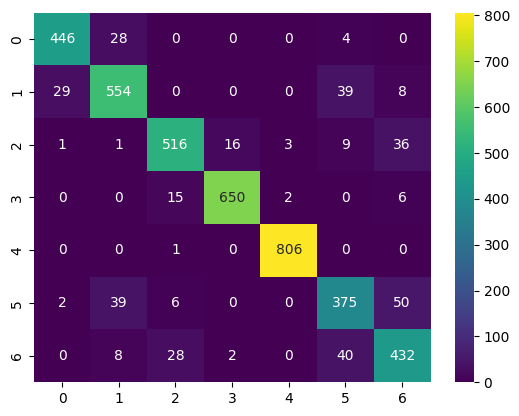

In [15]:
sns.heatmap(confusion_matrix_calc, annot=True, fmt="d", cmap="viridis")

In [16]:
dump(xgb_model, 'models/xgb_model.joblib')

['models/xgb_model.joblib']

In [18]:
y_pred_test = xgb_model.predict(test.drop("CALC_Always", axis=1).to_numpy())

In [19]:
y_pred_test

array([3, 5, 4, ..., 0, 1, 3])

In [20]:
classes = pd.read_csv("data/classes.csv")

In [22]:
classes["id"] = classes.index

In [23]:
classes

,NObeyesdad,id
0,Insufficient_Weight,0
1,Normal_Weight,1
2,Obesity_Type_I,2
3,Obesity_Type_II,3
4,Obesity_Type_III,4
5,Overweight_Level_I,5
6,Overweight_Level_II,6


In [24]:
result = pd.read_csv("data/test.csv")

In [25]:
result = pd.concat([result, pd.DataFrame(y_pred_test, columns=["NObeyesdad_id"])], axis=1)

In [27]:
result = result[["id", "NObeyesdad_id"]]

In [28]:
result

,id,NObeyesdad_id
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4
...,...,...
13835,34593,6
13836,34594,1
13837,34595,0
13838,34596,1


In [29]:
result = result.merge(classes, left_on="NObeyesdad_id", right_on="id")

In [31]:
result

,id_x,NObeyesdad_id,NObeyesdad,id_y
0,20758,3,Obesity_Type_II,3
1,20759,5,Overweight_Level_I,5
2,20760,4,Obesity_Type_III,4
3,20761,2,Obesity_Type_I,2
4,20762,4,Obesity_Type_III,4
...,...,...,...,...
13835,34593,6,Overweight_Level_II,6
13836,34594,1,Normal_Weight,1
13837,34595,0,Insufficient_Weight,0
13838,34596,1,Normal_Weight,1


In [32]:
result = result[["id_x", "NObeyesdad"]]

In [33]:
result = result.rename(columns={"id_x": "id"})

In [34]:
result

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [35]:
result.to_csv("data/result.csv", index=False)